# EDA

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

Load dataset into pandas dataframe and check data

In [1236]:
df = pd.read_excel('StockX-Data-Contest-2019-3.xlsx',sheet_name = 'Raw Data')

In [1237]:
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island


In [1238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
Order Date      99956 non-null datetime64[ns]
Brand           99956 non-null object
Sneaker Name    99956 non-null object
Sale Price      99956 non-null float64
Retail Price    99956 non-null int64
Release Date    99956 non-null datetime64[ns]
Shoe Size       99956 non-null float64
Buyer Region    99956 non-null object
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 6.1+ MB


In [1239]:
df.isnull().values.any()

False

We want to compare brands, so we should create two dataframes with each brand: Yeezy and Off-White.

In [1242]:
off_white_df = df[df['Brand'] == 'Off-White']
yeezy_df = df[df['Brand']== 'Yeezy']

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region


Check new new data frames

In [1243]:
off_white_df.head(5)

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
128,2017-09-07,Off-White,Nike-Air-Max-90-Off-White,1600.0,160,2017-09-09,8.0,California
129,2017-09-07,Off-White,Nike-Air-Max-90-Off-White,1090.0,160,2017-09-09,11.5,New York
130,2017-09-07,Off-White,Nike-Air-Presto-Off-White,1344.0,160,2017-09-09,10.0,New York
131,2017-09-07,Off-White,Nike-Air-Presto-Off-White,1325.0,160,2017-09-09,10.0,Massachusetts
132,2017-09-07,Off-White,Nike-Air-VaporMax-Off-White,1800.0,250,2017-09-09,12.0,Kentucky


In [1246]:
yeezy_df.head(5)


,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region


In [1253]:
df['Brand'].value_counts()

 Yeezy       72162
Off-White    27794
Name: Brand, dtype: int64

In [1271]:
df = df.apply(lambda x: x.replace(' Yeezy', 'Yeezy'))

In [1272]:
yeezy_df = df[df['Brand']== 'Yeezy']
yeezy_df.head(5)

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island


## Exploring Data of Dataset and Individul Brands

Quantity bought of each brand

In [1277]:
df['Brand'].value_counts()

Yeezy        72162
Off-White    27794
Name: Brand, dtype: int64

How many different sneakers are there?

In [16]:
df['Sneaker Name'].nunique()

50

Name of sneakers in the data

In [24]:
df['Sneaker Name'].unique()

array(['Adidas-Yeezy-Boost-350-Low-V2-Beluga',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Copper',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Green',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Red',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-White',
       'Adidas-Yeezy-Boost-350-V2-Cream-White',
       'Adidas-Yeezy-Boost-350-V2-Zebra',
       'Adidas-Yeezy-Boost-350-Low-Moonrock', 'Nike-Air-Max-90-Off-White',
       'Nike-Air-Presto-Off-White', 'Nike-Air-VaporMax-Off-White',
       'Air-Jordan-1-Retro-High-Off-White-Chicago',
       'Nike-Blazer-Mid-Off-White',
       'Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016',
       'Adidas-Yeezy-Boost-350-Low-Oxford-Tan',
       'Adidas-Yeezy-Boost-350-Low-Turtledove',
       'Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015',
       'Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow',
       'Nike-Air-Force-1-Low-Off-White', 'Nike-Air-Max-97-Off-White',
       'Nike-Air-Force-1-Low-Virgil

How many different regions are there?

In [1078]:
df['Buyer Region'].nunique()

51

What are the regions?

In [1079]:
df['Buyer Region'].unique()

array(['California', 'Kentucky', 'Rhode Island', 'Michigan', 'New York',
       'Kansas', 'Florida', 'New Jersey', 'Texas', 'North Carolina',
       'Oregon', 'Alabama', 'Delaware', 'Virginia', 'Wisconsin',
       'Colorado', 'Massachusetts', 'Pennsylvania', 'Louisiana',
       'Washington', 'Georgia', 'Ohio', 'Nebraska', 'Oklahoma',
       'Connecticut', 'Missouri', 'South Carolina', 'Maine', 'Illinois',
       'Nevada', 'Maryland', 'Arizona', 'Minnesota', 'Iowa', 'Tennessee',
       'West Virginia', 'Indiana', 'Arkansas', 'Alaska', 'Wyoming',
       'Utah', 'New Hampshire', 'Vermont', 'District of Columbia',
       'Hawaii', 'New Mexico', 'South Dakota', 'Mississippi',
       'North Dakota', 'Idaho', 'Montana'], dtype=object)

Highest shoe sale price

In [1280]:
df[df['Sale Price'] == df['Sale Price'].max()]

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
26870,2018-05-26,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,4050.0,190,2017-09-09,6.0,Wisconsin


Lowest shoe sale price

In [1081]:
df[df['Sale Price']== df ['Sale Price'].min()]

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
70545,2018-12-05,Yeezy,Adidas-Yeezy-Boost-350-V2-Sesame,186.0,220,2018-11-23,4.0,New Jersey


What is the profit and profit margin of each shoe?

Make profit column

In [1284]:
df['Profit'] = df['Sale Price']-df['Retail Price']

Make Profit Margin Column

In [1285]:
df['Profit Margin'] = (df['Profit']/ df['Sale Price']).round(4)

In [1286]:
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit,Profit Margin
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California,877.0,0.7995
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California,465.0,0.6788
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California,470.0,0.6812
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky,855.0,0.7953
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island,608.0,0.7343


Buyer Region is info about the state in which the buyer is from, so lets rename the column to 'Buyer State' and make a new column called 'Buyer Region'.

In [1287]:
def region(x):
    region = {0:['Arizona', 'Colorodo', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii','Oregon', 'Washington'], 1: ['Deleware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'District of Columbia', 'West Virginia','Alabama', 'Kentucky','Mississippi','Tennessee','Arkansas', 'Louisiana','Oklahoma','Texas'],2: ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin','Iowa', 'Kansas','Minnesota','Missouri','Nebraska', 'North Dakota', 'South Dakota'], 3: ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania']} 
    numerical = {0: 'West', 1:'South', 2: 'Midwest', 3:'Northeast'}
    if x in region[0]:
        return numerical[0]
    elif x in region[1]:
        return numerical[1]
    elif x in region[2]:
        return numerical[2]
    else:
        return numerical[3]

In [1288]:
df.rename(columns = {'Buyer Region': 'Buyer State'}, inplace = True)

In [1289]:
df['Buyer Region'] = df['Buyer State'].apply(lambda x : region(x))


In [1290]:
df.head(1)

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer State,Profit,Profit Margin,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California,877.0,0.7995,West


Reorder Columns so relevant information so the information is next to each other.

In [1291]:
df= df[['Order Date','Release Date', 'Brand', 'Sneaker Name', 'Retail Price', 'Sale Price','Profit','Profit Margin','Shoe Size','Buyer State', 'Buyer Region']]

In [1292]:
df.head(1)

,Order Date,Release Date,Brand,Sneaker Name,Retail Price,Sale Price,Profit,Profit Margin,Shoe Size,Buyer State,Buyer Region
0,2017-09-01,2016-09-24,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,220,1097.0,877.0,0.7995,11.0,California,West


In [1296]:
yeezy_df = df[df['Brand']== 'Yeezy']
off_white_df = df[df['Brand']== 'Off-White']

What shoes were bought under retail?

In [1295]:
Loss = df[df['Profit']< 0]
Loss['Sneaker Name'].unique()

array(['Adidas-Yeezy-Boost-350-V2-Cream-White',
       'adidas-Yeezy-Boost-350-V2-Butter',
       'Adidas-Yeezy-Boost-350-V2-Sesame',
       'Adidas-Yeezy-Boost-350-V2-Beluga-2pt0',
       'Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow'], dtype=object)

What brand had a loss?

In [1294]:
Loss['Brand'].unique()

array(['Yeezy'], dtype=object)

Descriptive stats of the brands

In [1298]:
df.describe()

,Retail Price,Sale Price,Profit,Profit Margin,Shoe Size
count,99956.00000,99956.000000,99956.000000,99956.000000,99956.000000
mean,208.61359,446.634754,238.021164,0.422654,9.344181
std,25.20001,255.982918,266.133127,0.235805,2.329588
min,130.00000,186.000000,-34.000000,-0.182800,3.500000
25%,220.00000,275.000000,58.000000,0.208600,8.000000
50%,220.00000,370.000000,154.000000,0.413300,9.500000
75%,220.00000,540.000000,342.000000,0.617400,11.000000
max,250.00000,4050.000000,3860.000000,0.953100,17.000000


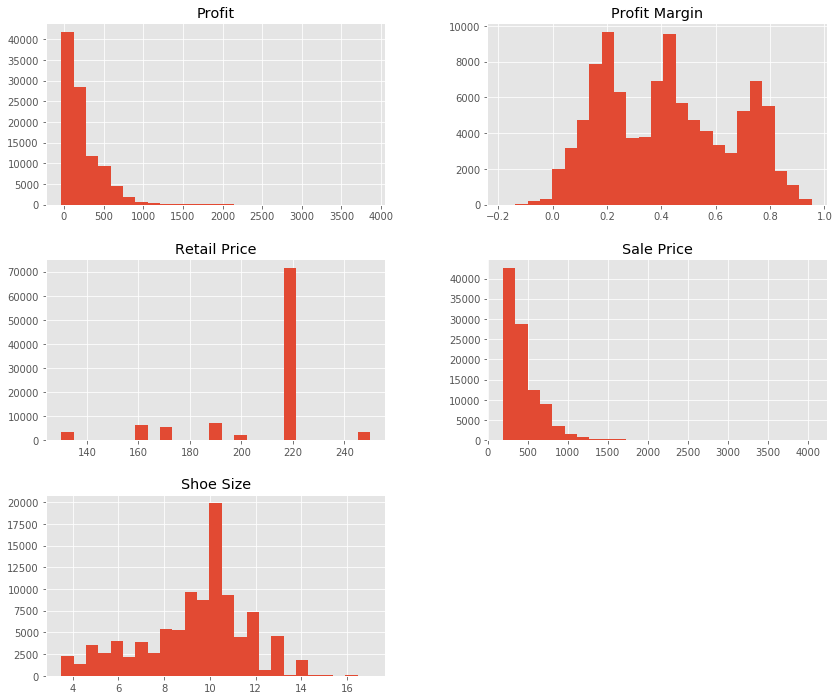

In [1311]:
df.hist(figsize = (14,12), bins = 25);


In [1299]:
yeezy_df.describe()

,Retail Price,Sale Price,Profit,Profit Margin,Shoe Size
count,72162.000000,72162.000000,72162.000000,72162.000000,72162.000000
mean,219.873895,360.032625,140.158730,0.323967,9.238332
std,1.583109,143.732130,144.348725,0.182568,2.382799
min,200.000000,186.000000,-34.000000,-0.182800,3.500000
25%,220.000000,268.000000,48.000000,0.179100,8.000000
50%,220.000000,316.000000,96.000000,0.303800,9.500000
75%,220.000000,399.000000,179.000000,0.448600,11.000000
max,220.000000,2300.000000,2100.000000,0.913000,17.000000


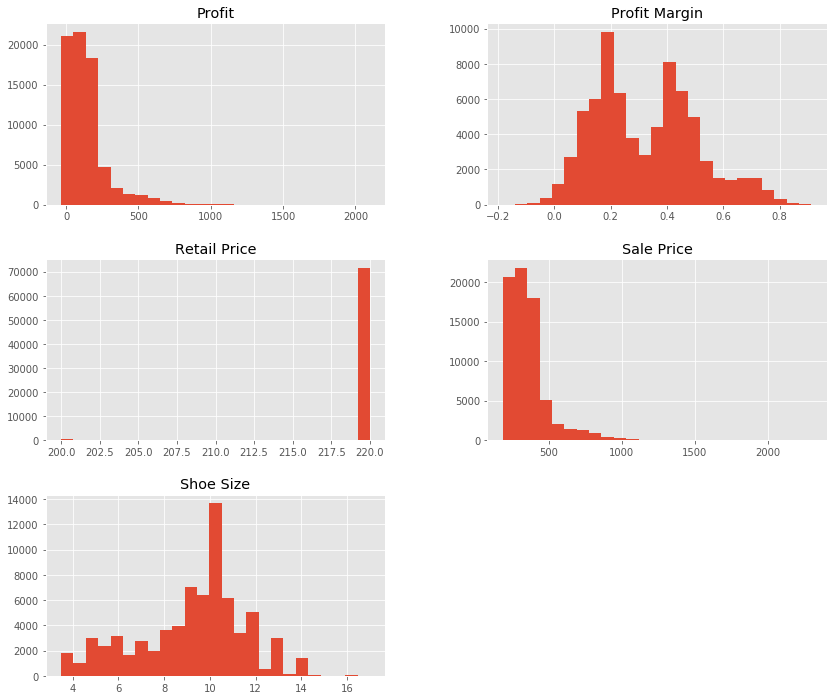

In [1312]:
yeezy_df.hist(figsize = (14,12), bins = 25);


In [1300]:
off_white_df.describe()

,Retail Price,Sale Price,Profit,Profit Margin,Shoe Size
count,27794.000000,27794.000000,27794.000000,27794.000000,27794.000000
mean,179.378283,671.481226,492.102943,0.678879,9.619001
std,33.066812,334.654897,333.462145,0.149980,2.161367
min,130.000000,203.000000,3.000000,0.014800,3.500000
25%,160.000000,498.000000,315.000000,0.588800,8.500000
50%,170.000000,610.000000,435.000000,0.728600,10.000000
75%,190.000000,770.000000,594.000000,0.780000,11.000000
max,250.000000,4050.000000,3860.000000,0.953100,17.000000


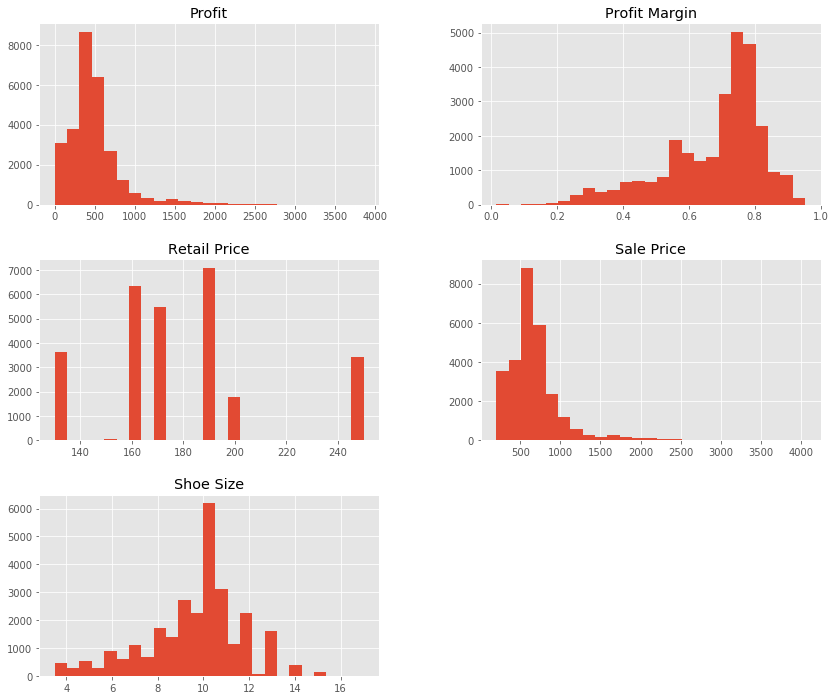

In [1314]:
off_white_df.hist(figsize = (14,12), bins = 25);


Top Sellers For Yeezy

In [1302]:
yeezy_df.groupby('Sneaker Name')['Sale Price'].mean().sort_values(ascending =False).head(5)

Sneaker Name
Adidas-Yeezy-Boost-350-Low-Turtledove           1531.661765
Adidas-Yeezy-Boost-350-Low-Oxford-Tan           1011.514286
Adidas-Yeezy-Boost-350-Low-Moonrock              996.710000
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016     984.237705
Adidas-Yeezy-Boost-350-V2-Core-Black-Red         937.754967
Name: Sale Price, dtype: float64

In [1305]:
yeezy_df.sort_values(by= 'Sale Price', ascending = False).head(5)

,Order Date,Release Date,Brand,Sneaker Name,Retail Price,Sale Price,Profit,Profit Margin,Shoe Size,Buyer State,Buyer Region
298,2017-09-14,2015-06-27,Yeezy,Adidas-Yeezy-Boost-350-Low-Turtledove,200,2300.0,2100.0,0.9130,14.0,Iowa,Midwest
72614,2018-12-10,2018-12-26,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,220,2000.0,1780.0,0.8900,9.5,New Jersey,Northeast
22731,2018-04-07,2015-11-14,Yeezy,Adidas-Yeezy-Boost-350-Low-Moonrock,200,2000.0,1800.0,0.9000,14.0,Michigan,Midwest
11413,2017-12-22,2017-12-16,Yeezy,Adidas-Yeezy-Boost-350-V2-Blue-Tint,220,2000.0,1780.0,0.8900,16.0,New York,Northeast
19965,2018-03-07,2015-06-27,Yeezy,Adidas-Yeezy-Boost-350-Low-Turtledove,200,1995.0,1795.0,0.8997,7.0,California,West


Top Sellers for Off-White

In [1307]:
off_white_df.groupby('Sneaker Name')['Sale Price'].mean().sort_values(ascending = False).head(5)

Sneaker Name
Air-Jordan-1-Retro-High-Off-White-White              1826.068894
Air-Jordan-1-Retro-High-Off-White-Chicago            1769.800000
Nike-Air-Presto-Off-White                            1236.055369
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100     975.516129
Nike-Air-Max-97-Off-White-Elemental-Rose-Queen        893.782407
Name: Sale Price, dtype: float64

In [1309]:
off_white_df.sort_values(by= 'Sale Price', ascending = False).head(5)

,Order Date,Release Date,Brand,Sneaker Name,Retail Price,Sale Price,Profit,Profit Margin,Shoe Size,Buyer State,Buyer Region
26870,2018-05-26,2017-09-09,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,190,4050.0,3860.0,0.9531,6.0,Wisconsin,Midwest
43410,2018-08-10,2017-09-09,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,190,3700.0,3510.0,0.9486,6.5,New York,Northeast
25935,2018-05-16,2018-06-23,Off-White,Air-Jordan-1-Retro-High-Off-White-University-Blue,190,3680.0,3490.0,0.9484,9.5,New Jersey,Northeast
47061,2018-08-30,2017-09-09,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,190,3500.0,3310.0,0.9457,6.5,New York,Northeast
95189,2019-02-03,2017-09-09,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,190,3400.0,3210.0,0.9441,7.0,California,West


In [1329]:
def bar_plot(x, y, x_label, y_label, horizontal = False):
    fig,ax = plt.subplots(figsize = (10,6))
    if horizontal:
        ax.barh(x,y, align = 'center')
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
    else:
        ax.bar(x,y, width = .35, color = 'rygb')
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        

### Looking at Data by Region

Total Shoes Bought

In [1477]:
total= df['Buyer Region'].value_counts()
total

West         32402
Northeast    31367
South        23338
Midwest      12849
Name: Buyer Region, dtype: int64

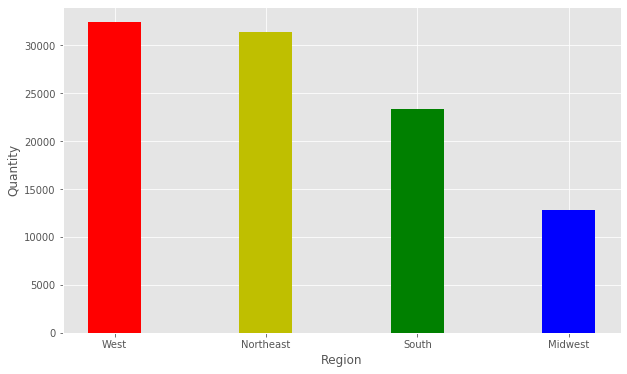

In [1330]:
total = df['Buyer Region'].value_counts()
x = total.index
bar_plot(x, total, 'Region', 'Quantity')

Total Amount Spent

In [1478]:
total =  df.groupby('Buyer Region')['Sale Price'].sum().sort_values(ascending = False)
total

Buyer Region
West         1.528840e+07
Northeast    1.382559e+07
South        1.005708e+07
Midwest      5.472745e+06
Name: Sale Price, dtype: float64

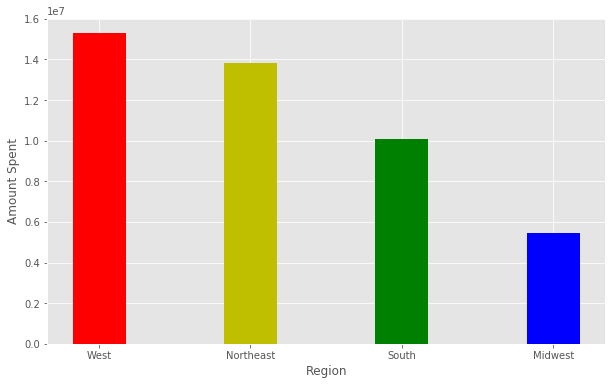

In [1334]:
total = df.groupby('Buyer Region')['Sale Price'].sum().sort_values(ascending = False)
x = total.index
bar_plot(x, total, 'Region', 'Amount Spent')

Means By Brand

In [1335]:
def region_df_lst(df, reg_names):
     return [df[df['Buyer Region']== reg]for reg in reg_names]    
    

In [1373]:
regions = ['West', 'Northeast', 'South', 'Midwest']
yeezy_reg = region_df_lst(yeezy_df, regions)
offwhite_reg = region_df_lst(off_white_df, regions)


In [1435]:
def means(df, column):
    return df[column].mean()


In [1442]:
def bar_plot_for_region_means(yeezy_reg, offwhite_reg,column,title,ylabel):
    
    # create lists of means for each brand
    yeezy= [means(reg,column) for reg in yeezy_reg]
    offwhite= [means(reg,column) for reg in offwhite_reg]
    
    #pair the two brands to each region
    yw, yne, ys, ymw = yeezy
    ow, one, os, omw = offwhite
    w,ne, s, mw = list(zip((yw, yne, ys, ymw),(ow, one, os, omw)))
      
    west = w
    northeast = ne
    south = s
    midwest = mw
    ind = np.arange(len(west))  
    width = 0.10 
    
    height1= np.arange(len(west))
    height2= [x + width for x in height1]
    height3= [x + width for x in height2]
    height4= [x + width for x in height3]

    fig, ax = plt.subplots()
    bar1= ax.bar(height1, west, width,
                label='West')
    bar2 = ax.bar(height2, northeast, width,
                label='Northeast')
    bar3 = ax.bar(height3, south, width,
                label='South')
    bar4= ax.bar(height4, midwest, width,
                label='Midwest')

    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(ind)
    ax.set_xticklabels(('Yeezy', 'Off-White'))
    ax.tick_params(axis='x', which='major', pad=15)
    ax.legend();


Sales Price

Yeezy

In [1465]:
def print_means(reg_df, column):
    lst = [means(reg, column) for reg in reg_df]
    for i in range(len(regions)):
        print('Mean ' +column + ' for {}: {}'.format(regions[i],lst[i]))

In [1469]:
print_means(yeezy_reg, 'Sale Price')

Mean Sale Price for West: 370.2411872901463
Mean Sale Price for Northeast: 358.2240715675206
Mean Sale Price for South: 353.747551971724
Mean Sale Price for Midwest: 351.89085297582153


Off-White

In [1466]:
print_means(offwhite_reg, 'Sale Price')

Mean Sale Price for West: 697.3002751912568
Mean Sale Price for Northeast: 668.7886924553196
Mean Sale Price for South: 643.3025683973638
Mean Sale Price for Midwest: 651.8906748659729


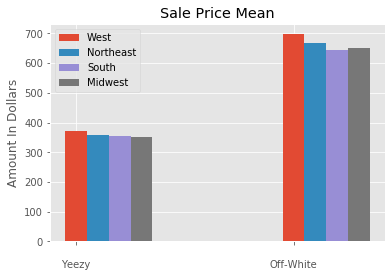

In [1444]:
bar_plot_for_region_means(yeezy_reg, offwhite_reg, 'Sale Price', 'Sale Price Mean', 'Amount In Dollars')

Profit

Yeezy

In [1467]:
print_means(yeezy_reg, 'Profit')

Mean Profit for West: 150.3781797242244
Mean Profit for Northeast: 138.35867860182373
Mean Profit for South: 133.85504744406148
Mean Profit for Midwest: 132.0045128228973


Off-White

In [1470]:
print_means(offwhite_reg, 'Profit')

Mean Profit for West: 519.0697734525584
Mean Profit for Northeast: 488.6147689816481
Mean Profit for South: 463.7012181321331
Mean Profit for Midwest: 471.3987164932198


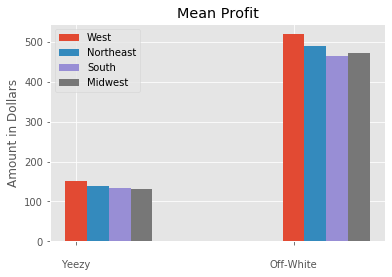

In [1447]:
bar_plot_for_region_means(yeezy_reg, offwhite_reg, 'Profit', 'Mean Profit', 'Amount in Dollars')

Profit Margin

Yeezy

In [1471]:
print_means(yeezy_reg, 'Profit Margin')

Mean Profit Margin for West: 0.34001998030173086
Mean Profit Margin for Northeast: 0.32156145896655397
Mean Profit Margin for South: 0.31340386165799533
Mean Profit Margin for Midwest: 0.3113213163876768


Off-White

In [1472]:
print_means(offwhite_reg, 'Profit Margin')

Mean Profit Margin for West: 0.6961610233482294
Mean Profit Margin for Northeast: 0.676636032145849
Mean Profit Margin for South: 0.6590929914804686
Mean Profit Margin for Midwest: 0.6687374645222322


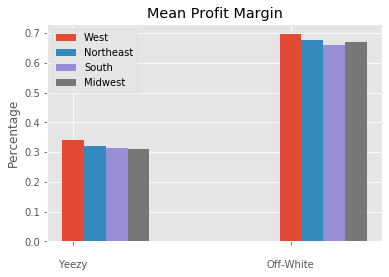

In [1449]:
bar_plot_for_region_means(yeezy_reg, offwhite_reg, 'Profit Margin', 'Mean Profit Margin', 'Percentage')

### Looking at  Data By States

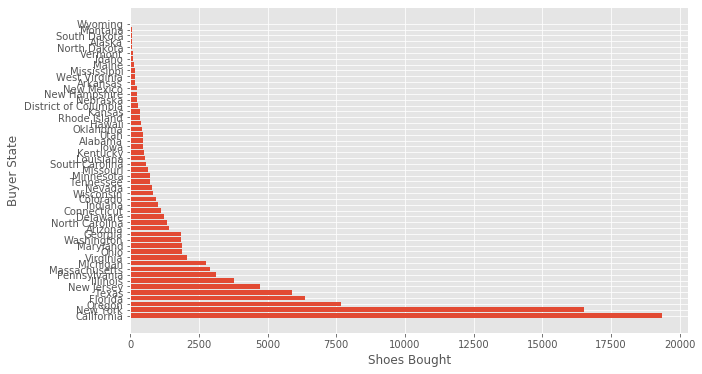

In [1473]:
buyer_state_amount = df['Buyer State'].value_counts()
bar_plot(buyer_state_amount.index, buyer_state_amount,'Shoes Bought', 'Buyer State', horizontal = True)

Look at top 5 states in Purchasing

In [1483]:
top_5 = buyer_state_amount.head(5)
top_5

California    19349
New York      16525
Oregon         7681
Florida        6376
Texas          5876
Name: Buyer State, dtype: int64

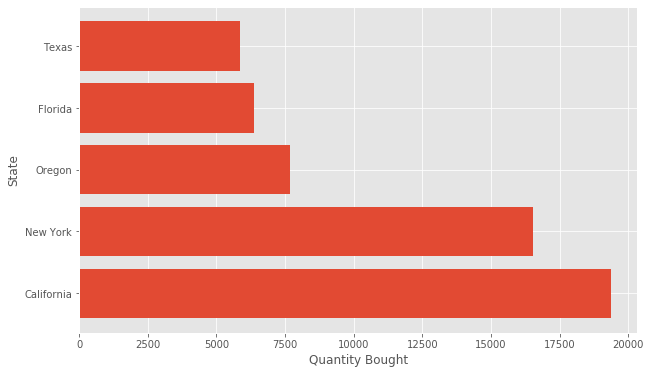

In [1484]:
top_5 = buyer_state_amount.head(5)
bar_plot(top_5.index, top_5, 'Quantity Bought', 'State', horizontal = True)

In [1494]:
top_5_spending = df.groupby('Buyer State')['Sale Price'].sum().sort_values(ascending = False).head(5)
top_5_spending

Buyer State
California    9.253625e+06
New York      7.316727e+06
Oregon        3.606621e+06
Florida       2.840034e+06
Texas         2.451756e+06
Name: Sale Price, dtype: float64

Boxplots to look at distribution of columns

In [1122]:
sale_price_off_white = df[df['Brand']=='Off-White']['Sale Price']
len(sale_price_off_white)

27794

In [1123]:
df['Brand']= df['Brand'].apply(lambda x : x.replace(' ', ''))

In [1124]:
sale_price_yeezy = df[df['Brand']=='Yeezy']['Sale Price']
len(sale_price_yeezy)

72162

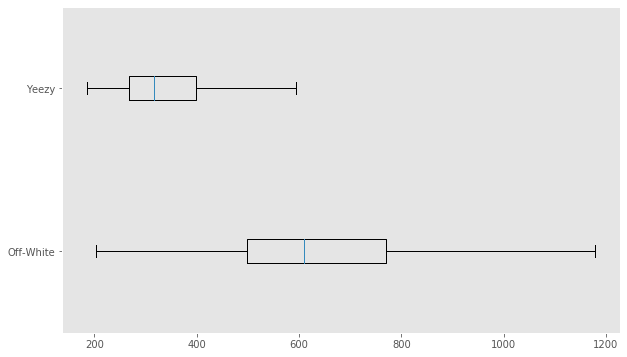

In [1125]:
fig, ax = plt.subplots(figsize = (10,6))
ax.boxplot([sale_price_off_white,sale_price_yeezy], showfliers = False, vert = False);
ax.set_yticklabels(['Off-White', 'Yeezy'])
ax.grid(False)

In [1126]:
sale_price_off_white.describe()

count    27794.000000
mean       671.481226
std        334.654897
min        203.000000
25%        498.000000
50%        610.000000
75%        770.000000
max       4050.000000
Name: Sale Price, dtype: float64

In [1127]:
ow_iqr = 770-498
off_white_upper_outlier =770+(1.5*ow_iqr)
off_white_lower_outlier = 498 -(1.5*ow_iqr)
print(off_white_lower_outlier)
print(off_white_upper_outlier)

90.0
1178.0


How many outliers are there for Off-White shoes?

In [1128]:
off_white_sale_price_outliers =  df[(df['Sale Price'] <= 90) | (df['Sale Price'] >= 1178)]
off_white_sale_price_outliers = off_white_sale_price_outliers[off_white_sale_price_outliers['Brand']=='Off-White']
off_white_sale_price_outliers.shape[0]

1674

In [1129]:
off_white_sale_price_outliers.to_excel('off_white_sale_price_outliers.xlsx')

In [1130]:
off_white_sale_price_outliers['Sneaker Name'].unique()

array(['Nike-Air-Max-90-Off-White', 'Nike-Air-Presto-Off-White',
       'Nike-Air-VaporMax-Off-White',
       'Air-Jordan-1-Retro-High-Off-White-Chicago',
       'Nike-Zoom-Fly-Off-White', 'Nike-Air-Force-1-Low-Off-White',
       'Nike-Blazer-Mid-Off-White',
       'Air-Jordan-1-Retro-High-Off-White-White',
       'Nike-Air-VaporMax-Off-White-2018',
       'Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100',
       'Nike-Air-Max-97-Off-White',
       'Air-Jordan-1-Retro-High-Off-White-University-Blue',
       'Nike-Air-Presto-Off-White-Black-2018',
       'Nike-Air-Presto-Off-White-White-2018',
       'Nike-Air-Max-97-Off-White-Elemental-Rose-Queen',
       'Nike-Blazer-Mid-Off-White-All-Hallows-Eve',
       'Nike-Blazer-Mid-Off-White-Wolf-Grey',
       'Nike-Air-Max-97-Off-White-Black',
       'Nike-Air-Max-97-Off-White-Menta',
       'Nike-Air-VaporMax-Off-White-Black'], dtype=object)

In [1131]:
df[(df['Sale Price'] ==203.0) & (df['Brand'] == 'Off-White')]

,Order Date,Release Date,Brand,Sneaker Name,Retail Price,Sale Price,Profit,Profit Margin,Shoe Size,Buyer State,Buyer Region
82740,2018-12-29,2018-06-14,Off-White,Nike-Zoom-Fly-Mercurial-Off-White-Total-Orange,200,203.0,3.0,0.0148,7.0,Illinois,Midwest


In [1132]:
df[(df['Sale Price'] ==4050.0) & (df['Brand'] == 'Off-White')]

,Order Date,Release Date,Brand,Sneaker Name,Retail Price,Sale Price,Profit,Profit Margin,Shoe Size,Buyer State,Buyer Region
26870,2018-05-26,2017-09-09,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,190,4050.0,3860.0,0.9531,6.0,Wisconsin,Midwest


Yeezy Outliers?

In [1133]:
sale_price_yeezy.describe()

count    72162.000000
mean       360.032625
std        143.732130
min        186.000000
25%        268.000000
50%        316.000000
75%        399.000000
max       2300.000000
Name: Sale Price, dtype: float64

In [1134]:
yeezy_iqr = 399-268
yeezy_upper_outlier = 399 +(1.5*yeezy_iqr)
yeezy_lower_outlier = 268-(1.5*yeezy_iqr)
print(yeezy_lower_outlier)
print(yeezy_upper_outlier)

71.5
595.5


How many outliers for Yeezys?


In [1135]:
yeezy_sale_price_outliers =  df[(df['Sale Price'] <= 71.5) | (df['Sale Price'] >= 595.5)]
yeezy_sale_price_outliers = yeezy_sale_price_outliers[yeezy_sale_price_outliers['Brand']=='Yeezy']
yeezy_sale_price_outliers.shape[0]

4851

In [1136]:
yeezy_sale_price_outliers.to_excel('yeezy_sale_price_outliers.xlsx')

In [1137]:
yeezy_sale_price_outliers['Sneaker Name'].unique()

array(['Adidas-Yeezy-Boost-350-Low-V2-Beluga',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Copper',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Green',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Red',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-White',
       'Adidas-Yeezy-Boost-350-V2-Zebra',
       'Adidas-Yeezy-Boost-350-Low-Moonrock',
       'Adidas-Yeezy-Boost-350-V2-Cream-White',
       'Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016',
       'Adidas-Yeezy-Boost-350-Low-Oxford-Tan',
       'Adidas-Yeezy-Boost-350-Low-Turtledove',
       'Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015',
       'Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow',
       'Adidas-Yeezy-Boost-350-V2-Beluga-2pt0',
       'Adidas-Yeezy-Boost-350-V2-Blue-Tint',
       'adidas-Yeezy-Boost-350-V2-Butter',
       'adidas-Yeezy-Boost-350-V2-Static',
       'adidas-Yeezy-Boost-350-V2-Static-Reflective'], dtype=object)

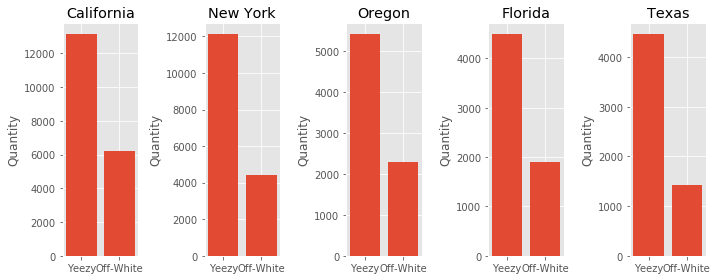

In [537]:
x = ca_count.index
y = [ca_count,ny_count,or_count,fl_count,tx_count]
title= ['California', 'New York', 'Oregon', 'Florida', 'Texas']
fig, axs = plt.subplots(1,5, figsize =(10,4))
for i, ax in enumerate(axs.flatten()):
    ax.bar(x,y[i])
    ax.set_title(title[i])
    ax.set_ylabel('Quantity')
plt.tight_layout()

In [608]:
state_spent = df.groupby(['Buyer State','Brand'])['Sale Price'].mean()
state_spent

Buyer State    Brand    
Alabama        Off-White    596.426829
               Yeezy        352.000000
Alaska         Off-White    644.400000
               Yeezy        333.463415
Arizona        Off-White    701.844665
                               ...    
West Virginia  Yeezy        336.893617
Wisconsin      Off-White    672.604762
               Yeezy        354.617460
Wyoming        Off-White    600.000000
               Yeezy        337.205128
Name: Sale Price, Length: 102, dtype: float64

In [1149]:
def brand_by_state(grouped_df, state):
    return [grouped_df.loc[(state,'Yeezy')],grouped_df.loc[(state,'Off-White')]]

def brand_by_multi_state(grouped_df, state_lst):
    return [brand_by_state(grouped_df, state) for state in state_lst]
def multi_bar(x, y,rows, columns,  title, ylabel):
    fig, axs = plt.subplots(rows, columns, figsize =(10,6))
    for i, ax in enumerate(axs.flatten()):
        ax.bar(x,y[i])
        ax.set_title(title[i])
        ax.set_ylabel(ylabel)
    plt.tight_layout()

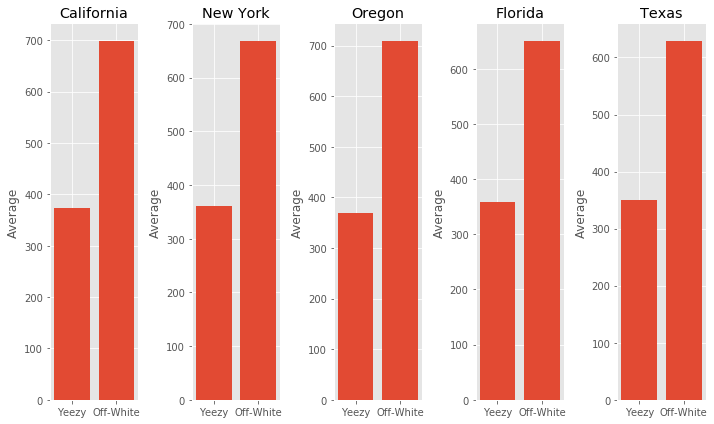

In [1150]:
top_5_states = ['California', 'New York', 'Oregon', 'Florida', 'Texas']
y = brand_by_multi_state(state_spent, top_5_states)
x = ['Yeezy', 'Off-White']
title = top_5_states
y_label = 'Average'

multi_bar(x,y,1,5,title,y_label)


Profit and Profit Margin Exploration 

In [1151]:
def box_plot(data,xticklabels, label, showfliers = False, vert = False):
    fig, ax = plt.subplots(figsize = (10,6))
    ax.grid(False)
    ax.boxplot(data, showfliers =showfliers, vert = vert)
    if vert:
        ax.set_xticklabels(xticklabels)
        ax.set_ylabel(ylabel)
    else:
        ax.set_yticklabels(xticklabels)
        ax.set_xlabel(label)


In [1152]:
average_profit = df.groupby('Brand')['Profit'].mean()

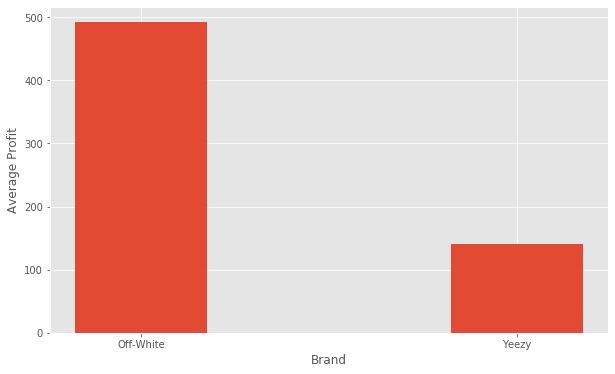

In [1153]:
bar_plot(average_profit.index, average_profit,'Brand', 'Average Profit')

In [1154]:
average_profit_margin = df.groupby('Brand')['Profit Margin'].mean()

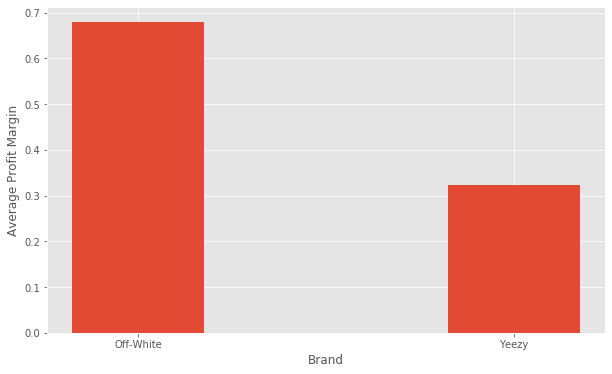

In [1155]:
bar_plot(average_profit_margin.index, average_profit_margin,'Brand', 'Average Profit Margin')

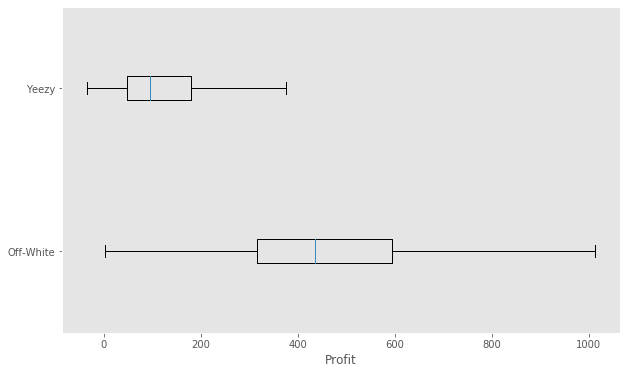

In [1156]:
ow_profit = df[df['Brand']== 'Off-White']['Profit']
yeezy_profit = df[df['Brand']=='Yeezy']['Profit']
box_plot([ow_profit,yeezy_profit],['Off-White','Yeezy'],'Profit')

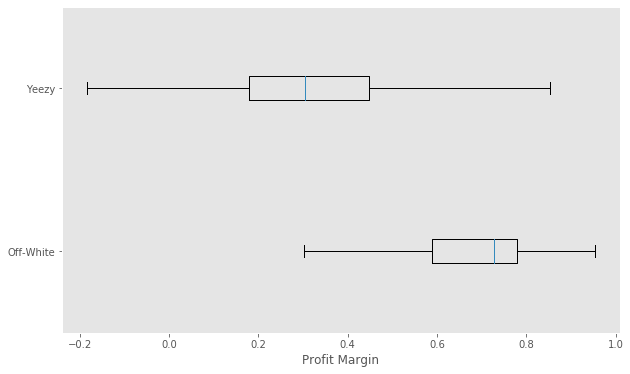

In [1157]:
ow_profit_margin= df[df['Brand']== 'Off-White']['Profit Margin']
yeezy_profit_margin= df[df['Brand']== 'Yeezy']['Profit Margin']
box_plot([ow_profit_margin,yeezy_profit_margin], ['Off-White','Yeezy'],'Profit Margin')

Based on State

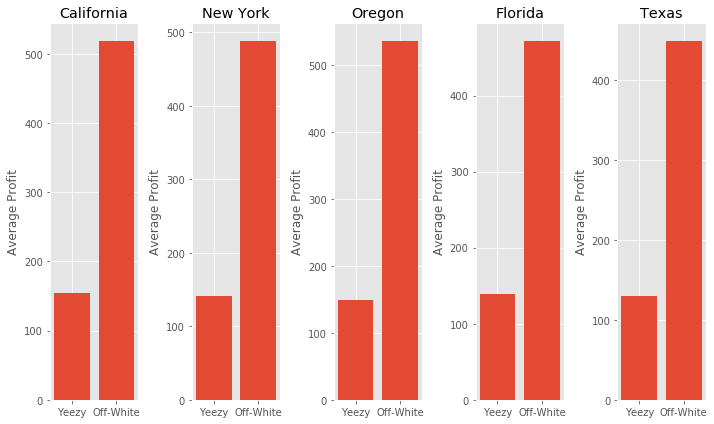

In [1158]:
state_average_profit = df.groupby(['Buyer State','Brand'])['Profit'].mean()
top_5_states = ['California', 'New York', 'Oregon', 'Florida', 'Texas']
y = brand_by_multi_state(state_average_profit, top_5_states)
x = ['Yeezy', 'Off-White']
title = top_5_states
y_label = 'Average Profit'

multi_bar(x,y,1,5,title,y_label)


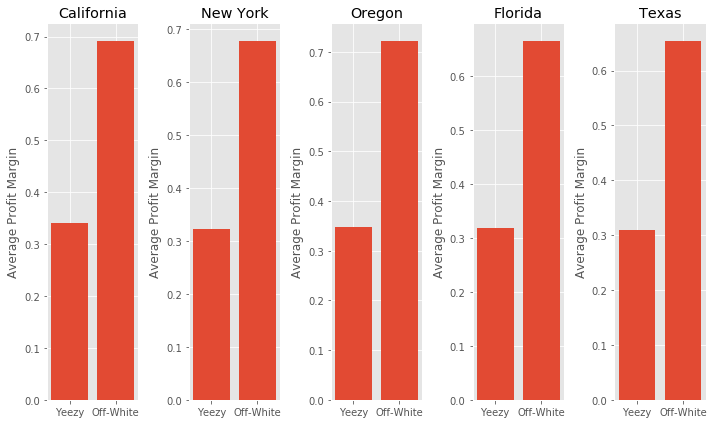

In [1159]:
state_average_profit_margin = df.groupby(['Buyer State','Brand'])['Profit Margin'].mean()
top_5_states = ['California', 'New York', 'Oregon', 'Florida', 'Texas']
y = brand_by_multi_state(state_average_profit_margin, top_5_states)
x = ['Yeezy', 'Off-White']
title = top_5_states
y_label = 'Average Profit Margin'

multi_bar(x,y,1,5,title,y_label)


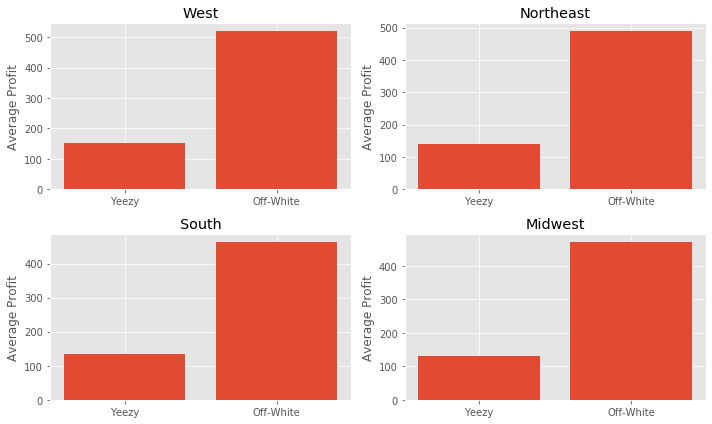

In [739]:
reg_average_profit = df.groupby(['Buyer Region','Brand'])['Profit'].mean()
region = ['West', 'Northeast', 'South', 'Midwest']
y = brand_by_multi_state(reg_average_profit, region)
x = ['Yeezy', 'Off-White']
title = region
y_label = 'Average Profit'

multi_bar(x,y,2,2,title,y_label)


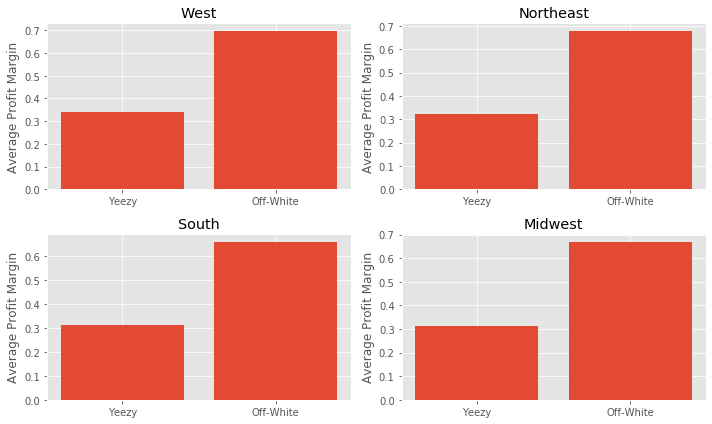

In [1160]:
region_average_profit_margin = df.groupby(['Buyer Region','Brand'])['Profit Margin'].mean()
region = ['West', 'Northeast', 'South', 'Midwest']
y = brand_by_multi_state(region_average_profit_margin, region)
x = ['Yeezy', 'Off-White']
title = region
y_label = 'Average Profit Margin'

multi_bar(x,y,2,2,title,y_label)

In [1163]:
off_white_df = df[df['Brand'] == 'Off-White']



In [1167]:
ow_avg_sale_price_by_month = off_white_df.groupby('month')['Sale Price'].mean()

In [1166]:
off_white_df['month'] = off_white_df['Order Date'].astype('datetime64[M]')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Average Sale Price Time Series

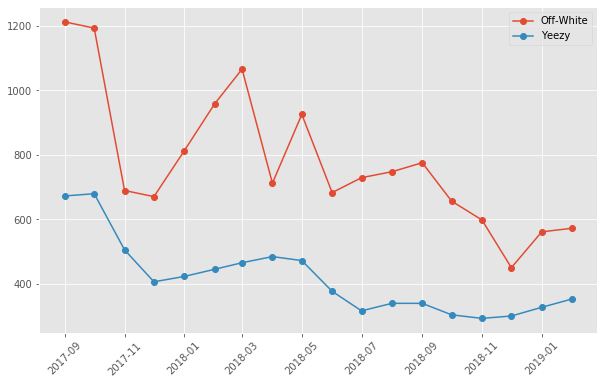

In [880]:
fig, ax = plt.subplots(figsize = (10,6))
ax.plot_date(ow_avg_sale_price_by_month.index, ow_avg_sale_price_by_month, linestyle = 'solid', label = 'Off-White')
ax.plot_date(yeezy_avg_sale_price_by_month.index, yeezy_avg_sale_price_by_month, linestyle = 'solid', label = 'Yeezy')
plt.xticks(rotation = 45)
ax.legend()

In [1168]:
yeezy_df = df[df['Brand']=='Yeezy']
yeezy_df['month'] = yeezy_df['Order Date'].astype('datetime64[M]')
yeezy_avg_sale_price_by_month = yeezy_df.groupby('month')['Sale Price'].mean()


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Average Profit Time Series

In [1169]:
def timeseries_by_month(data):
    fig, ax = plt.subplots(figsize = (10,6)) 
    for d in data:
        ax.plot_date(d.index, d, linestyle = 'solid')
    plt.xticks(rotation = 45)

    

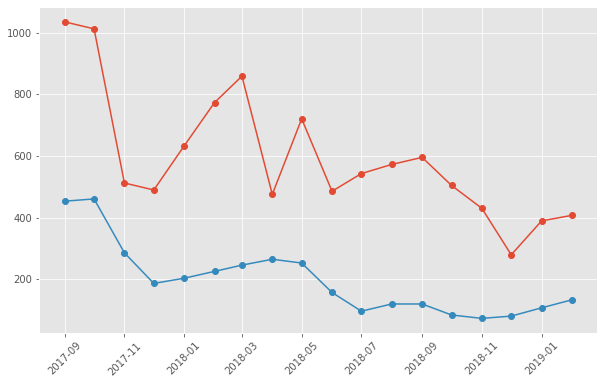

In [1170]:
ow_avg_profit = off_white_df.groupby('month')['Profit'].mean()
yeezy_avg_profit = yeezy_df.groupby('month')['Profit'].mean()
timeseries_by_month([ow_avg_profit,yeezy_avg_profit])


Average Sale Price By Region

In [1171]:
yeezy_west_df = yeezy_df[yeezy_df['Buyer Region']=='West']
yeezy_northeast_df = yeezy_df[yeezy_df['Buyer Region']=='Northeast']
yeezy_south_df = yeezy_df[yeezy_df['Buyer Region']=='South']
yeezy_midwest_df= yeezy_df[yeezy_df['Buyer Region']=='Midwest']

In [1172]:
yeezy_west_avg_sale_price = yeezy_west_df.groupby('month')['Sale Price'].mean()
yeezy_northeast_avg_sale_price= yeezy_northeast_df.groupby('month')['Sale Price'].mean()
yeezy_south_avg_sale_price= yeezy_south_df.groupby('month')['Sale Price'].mean()
yeezy_midwest_avg_sale_price= yeezy_midwest_df.groupby('month')['Sale Price'].mean()

In [1173]:
y_avg_reg_lst = [yeezy_west_avg_sale_price,yeezy_northeast_avg_sale_price,yeezy_south_avg_sale_price,yeezy_midwest_avg_sale_price]

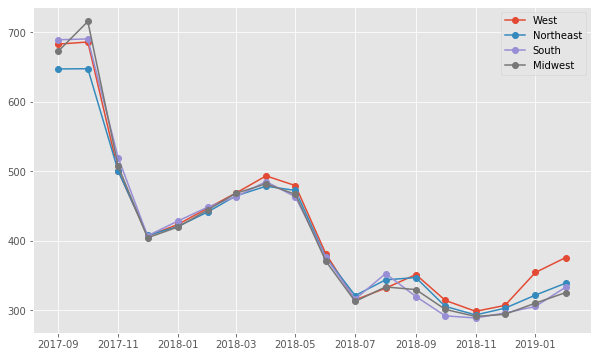

In [1174]:
fig, ax = plt.subplots(figsize = (10,6))
label = ['West', 'Northeast', 'South', 'Midwest']
for i,y in enumerate(y_avg_reg_lst):
    ax.plot_date(y.index,y,linestyle = 'solid',label =label[i])
ax.legend()

Average Sales by Region

In [1175]:
yeezy_west_sales = yeezy_west_df.groupby('month').size()
yeezy_northeast_sales= yeezy_northeast_df.groupby('month').size()
yeezy_south_sales= yeezy_south_df.groupby('month').size()
yeezy_midwest_sales= yeezy_midwest_df.groupby('month').size()
y_sales = [yeezy_west_sales,yeezy_northeast_sales,yeezy_south_sales,yeezy_midwest_sales]

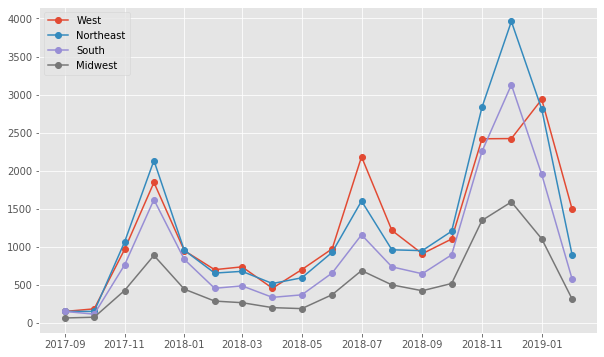

In [1176]:
fig, ax = plt.subplots(figsize = (10,6))
label = ['West', 'Northeast', 'South', 'Midwest']
for i,y in enumerate(y_sales):
    ax.plot_date(y.index,y,linestyle = 'solid', label = lab[i])
ax.legend()

In [1177]:
ow_west_df = off_white_df[off_white_df['Buyer Region']=='West']
ow_northeast_df = off_white_df[off_white_df['Buyer Region']=='Northeast']
ow_south_df = off_white_df[off_white_df['Buyer Region']=='South']
ow_midwest_df= off_white_df[off_white_df['Buyer Region']=='Midwest']

In [1178]:
ow_west_sales = ow_west_df.groupby('month').size()
ow_northeast_sales= ow_northeast_df.groupby('month').size()
ow_south_sales= ow_south_df.groupby('month').size()
ow_midwest_sales= ow_midwest_df.groupby('month').size()
ow_sales = [ow_west_sales,ow_northeast_sales,ow_south_sales,ow_midwest_sales]

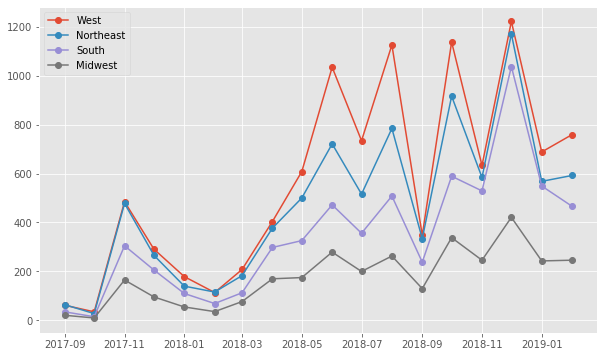

In [1179]:
fig, ax = plt.subplots(figsize = (10,6))
label = ['West', 'Northeast', 'South', 'Midwest']
for i, o in enumerate(ow_sales):
    ax.plot_date(o.index,o,linestyle = 'solid', label = label[i])
ax.legend()


Hypothesis Testing

In [1186]:
stats.ttest_ind(yeezy_df['Sale Price'],off_white_df['Sale Price'], equal_var = False)

Ttest_indResult(statistic=-149.920191136289, pvalue=0.0)

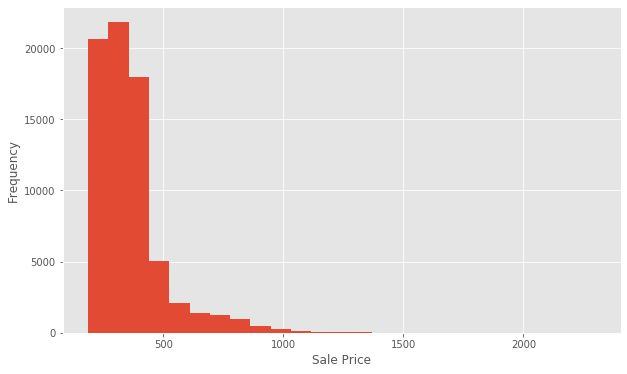

In [1187]:
hist_plot(yeezy_df['Sale Price'], 'Sale Price', 'Frequency')

(array([1.2276e+04, 1.2438e+04, 1.9560e+03, 5.5100e+02, 3.4000e+02,
        1.5300e+02, 5.7000e+01, 1.7000e+01, 3.0000e+00, 3.0000e+00]),
 array([ 203. ,  587.7,  972.4, 1357.1, 1741.8, 2126.5, 2511.2, 2895.9,
        3280.6, 3665.3, 4050. ]),
 <a list of 10 Patch objects>)

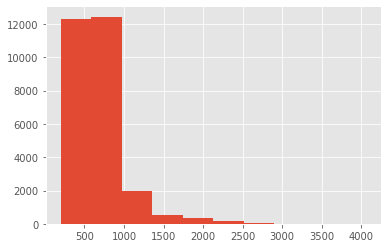

In [1188]:
plt.hist(off_white_df['Sale Price'])

In [1189]:
sale_price_ow = off_white_df['Sale Price']

In [1190]:
lower, upper = sale_price_ow.quantile([.025,.975])


In [1191]:
ow_sale_price95 = sale_price_ow[(sale_price_ow >= lower) & (sale_price_ow <= upper)]

In [1192]:
sale_price_y = yeezy_df['Sale Price']
ylower, yupper = sale_price_y.quantile([.025, .975])
y_sale_price95 = sale_price_y[(sale_price_y >= ylower) & (sale_price_y <= yupper)]

In [1193]:
stats.ttest_ind(y_sale_price95,ow_sale_price95, equal_var = False)

Ttest_indResult(statistic=-193.3549836078009, pvalue=0.0)

In [1194]:
y_sale_price95.mean()

348.4381642198628

In [1195]:
ow_sale_price95.mean()

646.2644661201151

In [1196]:
yeezy_map = yeezy_df.groupby('Buyer State').size()
ow_map = off_white_df.groupby('Buyer State').size()

In [1023]:
yeezy_map.to_csv('YeezyState.csv',)

/Users/hien/desktop/galvanize/Yeezy-vs.-Off-White


In [1027]:
ow_map.to_csv('Off-WhiteState.csv')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [1029]:
yeezy_mean_price = yeezy_df.groupby('Buyer State')['Sale Price'].mean()

In [1031]:
yeezy_mean_price.to_csv('yeezy_mean_price.csv')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [1032]:
off_white_mean_price = off_white_df.groupby('Buyer State')['Sale Price'].mean()

In [1035]:
off_white_mean_price.to_csv('offwhite_mean_price.csv')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [1197]:
yeezy_id_sale_price = yeezy_df[yeezy_df['Buyer State']=='Idaho']['Sale Price']
offwhite_id_sale_price = off_white_df[off_white_df['Buyer State']=='Idaho']['Sale Price']

In [1198]:
stats.ttest_ind(yeezy_id_sale_price,offwhite_id_sale_price, equal_var = False)

Ttest_indResult(statistic=-4.288212238606462, pvalue=0.0002075902524255087)

In [1199]:
yeezy_df['Sale Price'].mean()

360.0326250782962

In [1200]:
off_white_df['Sale Price'].mean()

671.4812264085775

In [1201]:
671-360

311

In [1208]:
yeezy_total = yeezy_df['Sale Price'].sum()

In [1209]:
offwhite_total = off_white_df['Sale Price'].sum()

In [1210]:
total = yeezy_total + offwhite_total

In [1211]:
yeezy_total/total

0.5819545069261036